# LINEAR REGRESSION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('1.04.+Real-life+example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
dropped_data = data.drop('Model', axis=1)
dropped_data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
dropped_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
nomv_data =dropped_data.dropna(axis=0)
nomv_data.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


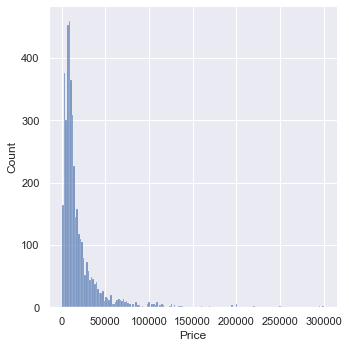

In [8]:
sns.displot(data['Price'])

In [12]:
q = nomv_data['Price'].quantile(0.99)
price_data =nomv_data[nomv_data['Price']<q]
price_data.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


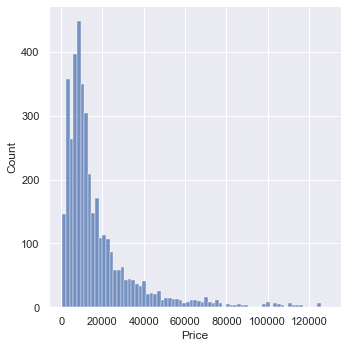

In [18]:
sns.displot(price_data['Price'])

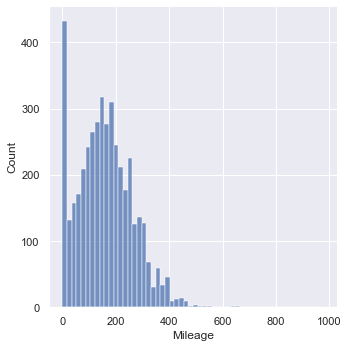

In [19]:
sns.displot(data['Mileage'])

In [20]:
q = price_data['Mileage'].quantile(0.99)
mileage_data =price_data[price_data['Mileage']<q]
mileage_data.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


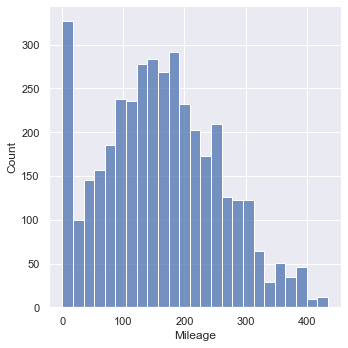

In [21]:
sns.displot(mileage_data['Mileage'])

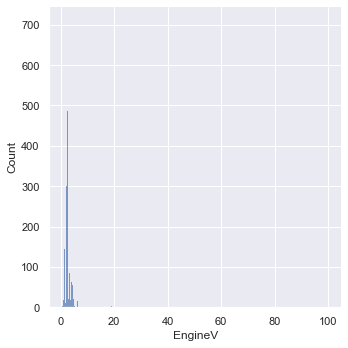

In [25]:
sns.displot(data['EngineV'])

In [26]:
engv_data = mileage_data[mileage_data['EngineV']<6.5]
engv_data.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


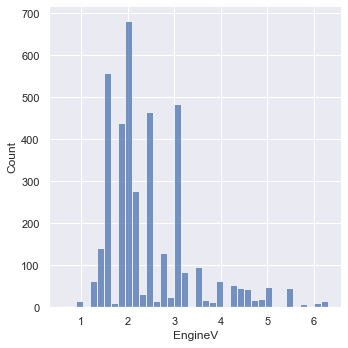

In [27]:
sns.displot(engv_data['EngineV'])


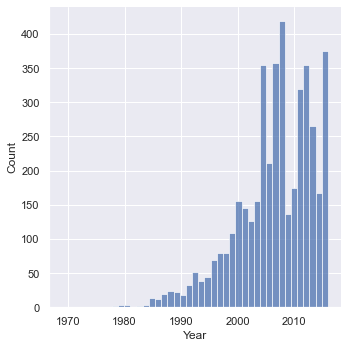

In [28]:
sns.displot(data['Year'])

In [29]:
q = engv_data['Year'].quantile(0.01)
year_data= engv_data[engv_data['Year']>q]
year_data.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


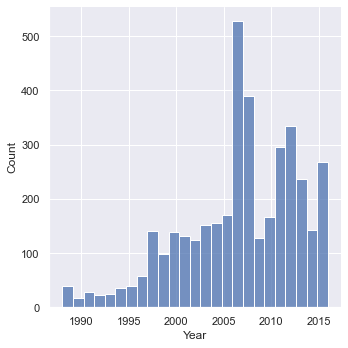

In [32]:
sns.displot(year_data['Year'])

In [33]:
cleaned_data = year_data.reset_index(drop=True)
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


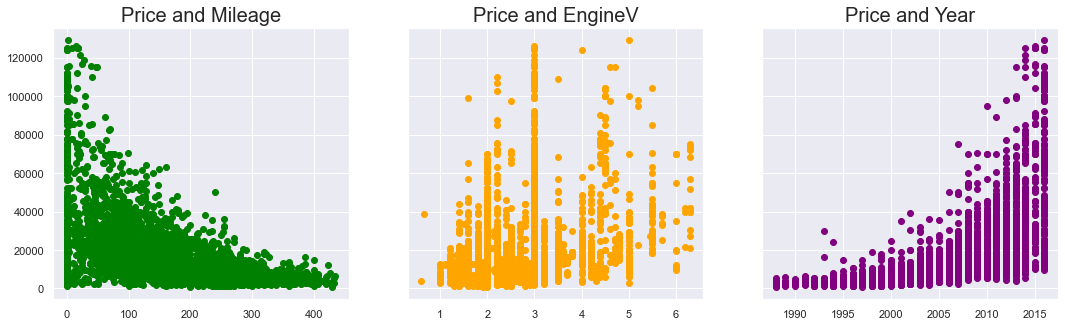

In [34]:
f,(ax1,ax2,ax3)= plt.subplots(1,3, sharey= True, figsize=(18,5))

ax1.scatter(cleaned_data['Mileage'],cleaned_data['Price'], c='green')
ax1.set_title('Price and Mileage', fontsize=20)
ax2.scatter(cleaned_data['EngineV'],cleaned_data['Price'], c='orange')
ax2.set_title('Price and EngineV',fontsize=20)
ax3.scatter(cleaned_data['Year'],cleaned_data['Price'],c='purple')
ax3.set_title('Price and Year',fontsize=20)

plt.show()

In [35]:
log_price = np.log(cleaned_data['Price'])

In [36]:
cleaned_data['log_price']= log_price
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [37]:
cleaned_data =cleaned_data.drop(['Price'],axis =1)
cleaned_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


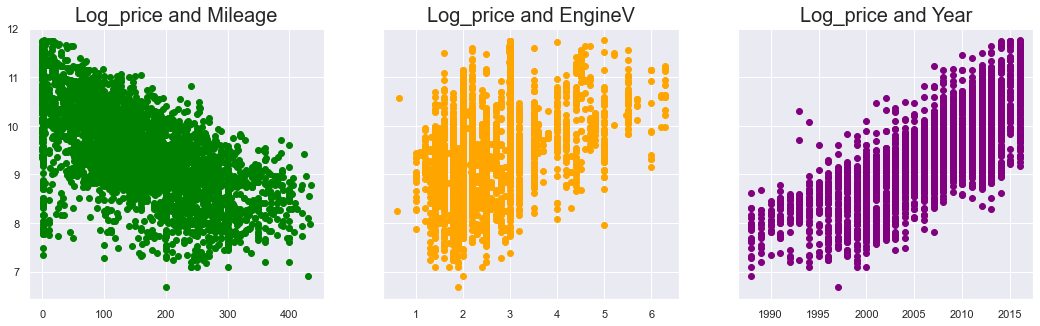

In [38]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(18,5))

ax1.scatter(cleaned_data['Mileage'],cleaned_data['log_price'], c='green')
ax1.set_title('Log_price and Mileage', fontsize=20)
ax2.scatter(cleaned_data['EngineV'],cleaned_data['log_price'], c='orange')
ax2.set_title('Log_price and EngineV',fontsize=20)
ax3.scatter(cleaned_data['Year'],cleaned_data['log_price'],c='purple')
ax3.set_title('Log_price and Year',fontsize=20)

plt.show()


In [39]:
cleaned_data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [41]:
variables = cleaned_data[['Mileage','EngineV', 'Year']]

In [42]:
vif = pd.DataFrame()

In [43]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [160]:
vif['Features']= variables.columns

In [161]:
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [164]:
nomc_data= cleaned_data.drop(['Year'], axis=1)
nomc_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [166]:
nomc_data.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [168]:
dummies_data = pd.get_dummies(nomc_data, drop_first= True)
dummies_data

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [169]:
dummies_data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [170]:
cols =['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [171]:
preprocessed_data = dummies_data[cols]
preprocessed_data.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [173]:
targets = preprocessed_data['log_price']
features= preprocessed_data.drop(['log_price'], axis=1)

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()

In [176]:
scaler.fit(features)

StandardScaler()

In [177]:
features_scaled = scaler.transform(features)

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train,x_test,y_train,y_test = train_test_split(features_scaled,targets,test_size =0.2,random_state=365)

In [180]:
reg =LinearRegression()

In [181]:
reg.fit(x_train,y_train)

LinearRegression()

In [182]:
y_hat = reg.predict(x_train)

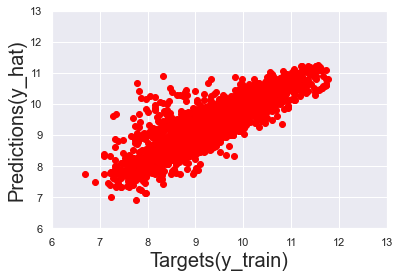

In [183]:
plt.scatter(y_train,y_hat, c= 'red')
plt.xlabel('Targets(y_train)',size =20)
plt.ylabel('Predictions(y_hat)', size =20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

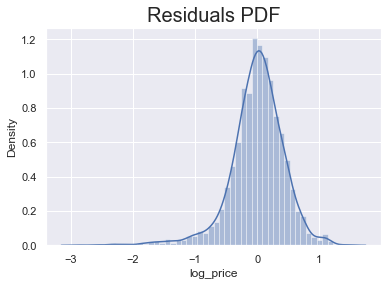

In [184]:
sns.distplot(y_train-y_hat)

plt.title('Residuals PDF', size=20)

In [185]:
reg.score(x_train,y_train)

0.744996578792662

In [186]:
def adj_r2(x_train,y_train):
    r2 = reg.score(x_train,y_train)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [187]:
adj_r2(x_train,y_train)

0.7435868037811093

In [188]:
reg.intercept_

9.415239458021299

In [189]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [190]:
reg.summary=pd.DataFrame(features.columns.values, columns=['Features'])
reg.summary['Weights'] = reg.coef_
reg.summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [191]:
cleaned_data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [192]:
cleaned_data['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [193]:
cleaned_data['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [194]:
cleaned_data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [195]:
y_hat_test = reg.predict(x_test)

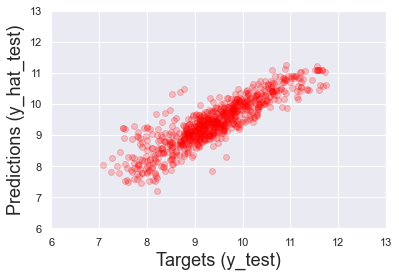

In [201]:
plt.scatter(y_test, y_hat_test, c= 'red', alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [202]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [203]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [209]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [205]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [207]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,NaN,NaN,NaN
1,3499.255242,7900.0,4400.744758,55.705630
2,7553.285218,NaN,NaN,NaN
3,7463.963017,NaN,NaN,NaN
4,11353.490075,NaN,NaN,NaN
...,...,...,...,...
769,29651.726363,6950.0,-22701.726363,326.643545
770,10732.071179,NaN,NaN,NaN
771,13922.446953,NaN,NaN,NaN
772,27487.751303,NaN,NaN,NaN


In [210]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,147.000000,147.000000,147.000000
mean,15946.760167,14463.840340,-2245.724613,160.027708
std,13133.197604,14242.311606,20036.962794,285.224728
min,1320.562768,1400.000000,-62998.368303,0.287114
25%,7413.644234,6600.000000,-12990.588876,36.783373
50%,11568.168859,10700.000000,-1826.259439,68.902496
75%,20162.408805,17825.000000,6300.488157,173.709107
max,77403.055224,109999.000000,99435.606951,2571.361972


In [211]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
109,12663.54,12700.00,36.46,0.29
606,20680.40,20500.00,-180.40,0.88
433,6977.90,6900.00,-77.90,1.13
8,11581.54,11950.00,368.46,3.08
330,11336.71,10800.00,-536.71,4.97
440,8638.63,8200.00,-438.63,5.35
84,4364.08,4000.00,-364.08,9.10
31,12858.08,14500.00,1641.92,11.32
313,10014.71,11600.00,1585.29,13.67
122,19335.34,22700.00,3364.66,14.82
